#                      2020_ipl_score_prediction

# Team: SAM_UDAY

teammates : 1) B.UDAY CHANDRA
            2) K.SAM ASHRAY

# Importing libraries

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns

# loading dataset

In [144]:
train_df = pd.read_excel('Data.xlsx',sheet_name='Train_Data')
test_df = pd.read_excel('Data.xlsx',sheet_name = 'Test_Data')

total_df = pd.concat([train_df,test_df])
total_df.shape

(200, 14)

# Data cleaning and analysing

In [145]:
train_df.shape

(100, 14)

In [146]:
train_df.head(5)

,PLAYER,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8,160
1,AB de Villiers,12,11,2,480,90*,53.33,275,174.54,0,6,39,30,424
2,Abhishek Sharma,3,3,2,63,46*,63,33,190.90,0,0,3,5,63
3,Ajinkya Rahane,15,14,1,370,65*,28.46,313,118.21,0,1,39,5,396
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6,165


In [147]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 99
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PLAYER     200 non-null    object 
 1   Mat        200 non-null    int64  
 2   Inns       200 non-null    int64  
 3   NO         200 non-null    int64  
 4   2018_Runs  100 non-null    float64
 5   HS         200 non-null    object 
 6   Avg        200 non-null    object 
 7   BF         200 non-null    int64  
 8   SR         200 non-null    float64
 9   100        200 non-null    int64  
 10  50         200 non-null    int64  
 11  4s         200 non-null    int64  
 12  6s         200 non-null    int64  
 13  2019_Runs  200 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 23.4+ KB


In [148]:
#NT = '*'
#total_df['NT'] = total_df['HS'].str.find(NT)

#total_df['NT'] = total_df['NT'].replace(np.nan,0).astype('int')
#total_df['NT'] = total_df['NT'].replace(2,1).astype('int')
#total_df.head()

In [149]:
print("shape of combined dataset = {}".format(total_df.shape))

shape of combined dataset = (200, 14)


In [150]:
total_df['HS'] = total_df['HS'].replace('\*','',regex=True).astype(int)

In [151]:
total_df.head(5)

,PLAYER,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
0,Aaron Finch,10,9,1,134.0,46,16.75,100,134.00,0,0,6,8,160
1,AB de Villiers,12,11,2,480.0,90,53.33,275,174.54,0,6,39,30,424
2,Abhishek Sharma,3,3,2,63.0,46,63,33,190.90,0,0,3,5,63
3,Ajinkya Rahane,15,14,1,370.0,65,28.46,313,118.21,0,1,39,5,396
4,Alex Hales,6,6,0,148.0,45,24.66,118,125.42,0,0,13,6,165


In [152]:
total_df.tail(5)

,PLAYER,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
95,Carlos Brathwaite,2,2,0,NaN,6,5.5,10,110.00,0,0,1,0,11
96,Ishant Sharma,13,3,3,NaN,10,-,3,333.33,0,0,1,1,10
97,Shakib Al Hasan,3,1,0,NaN,9,9,10,90.00,0,0,0,0,9
98,Pawan Negi,7,4,0,NaN,5,2.25,12,75.00,0,0,1,0,9
99,Tim Southee,3,1,1,NaN,9,-,9,100.00,0,0,0,0,9


In [153]:
#train data as 2019 and 2018 Runs
#test data as 2019 Runs thought of removing 2018_runs from train.

In [154]:
total_df['Avg'] = total_df['Avg'].replace('-',np.nan,regex = True)

In [155]:
total_df.head(5)

,PLAYER,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
0,Aaron Finch,10,9,1,134.0,46,16.75,100,134.00,0,0,6,8,160
1,AB de Villiers,12,11,2,480.0,90,53.33,275,174.54,0,6,39,30,424
2,Abhishek Sharma,3,3,2,63.0,46,63.00,33,190.90,0,0,3,5,63
3,Ajinkya Rahane,15,14,1,370.0,65,28.46,313,118.21,0,1,39,5,396
4,Alex Hales,6,6,0,148.0,45,24.66,118,125.42,0,0,13,6,165


In [156]:
#batting_avg = HS - (Inns - NO)

In [157]:
total_df['Avg']  = total_df['Avg'].fillna(total_df['HS'] - (total_df['Inns'] - total_df['NO']))

In [158]:
total_df.tail(5)

,PLAYER,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
95,Carlos Brathwaite,2,2,0,NaN,6,5.50,10,110.00,0,0,1,0,11
96,Ishant Sharma,13,3,3,NaN,10,10.00,3,333.33,0,0,1,1,10
97,Shakib Al Hasan,3,1,0,NaN,9,9.00,10,90.00,0,0,0,0,9
98,Pawan Negi,7,4,0,NaN,5,2.25,12,75.00,0,0,1,0,9
99,Tim Southee,3,1,1,NaN,9,9.00,9,100.00,0,0,0,0,9


In [159]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 99
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PLAYER     200 non-null    object 
 1   Mat        200 non-null    int64  
 2   Inns       200 non-null    int64  
 3   NO         200 non-null    int64  
 4   2018_Runs  100 non-null    float64
 5   HS         200 non-null    int32  
 6   Avg        200 non-null    float64
 7   BF         200 non-null    int64  
 8   SR         200 non-null    float64
 9   100        200 non-null    int64  
 10  50         200 non-null    int64  
 11  4s         200 non-null    int64  
 12  6s         200 non-null    int64  
 13  2019_Runs  200 non-null    int64  
dtypes: float64(3), int32(1), int64(9), object(1)
memory usage: 22.7+ KB


In [160]:
#we can drop NT or we can continue 

In [161]:
#spliting the actual train and test data

train = total_df.iloc[:100]
test = total_df.iloc[100:]
test = test.drop(['2018_Runs'],axis=1)

In [162]:
train.head(5)

,PLAYER,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
0,Aaron Finch,10,9,1,134.0,46,16.75,100,134.00,0,0,6,8,160
1,AB de Villiers,12,11,2,480.0,90,53.33,275,174.54,0,6,39,30,424
2,Abhishek Sharma,3,3,2,63.0,46,63.00,33,190.90,0,0,3,5,63
3,Ajinkya Rahane,15,14,1,370.0,65,28.46,313,118.21,0,1,39,5,396
4,Alex Hales,6,6,0,148.0,45,24.66,118,125.42,0,0,13,6,165


In [163]:
# coping id column
players = pd.DataFrame()
players['name'] = train['PLAYER'] 
train = train.drop(['PLAYER'],axis= 1)

In [164]:
#we are trying to pridict 2020 score according to given last year stats

In [165]:
train = train.rename(columns = {"2018_Runs" : "prev_Runs"})
train

,Mat,Inns,NO,prev_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
0,10,9,1,134.0,46,16.75,100,134.00,0,0,6,8,160
1,12,11,2,480.0,90,53.33,275,174.54,0,6,39,30,424
2,3,3,2,63.0,46,63.00,33,190.90,0,0,3,5,63
3,15,14,1,370.0,65,28.46,313,118.21,0,1,39,5,396
4,6,6,0,148.0,45,24.66,118,125.42,0,0,13,6,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14,14,3,530.0,92,48.18,381,139.10,0,4,52,18,488
96,7,6,3,65.0,35,21.66,38,171.05,0,0,5,4,64
97,11,10,2,122.0,35,15.25,102,119.60,0,0,17,1,115
98,15,13,4,260.0,45,28.88,200,130.00,0,0,22,11,296


In [166]:
#target variable
X = train.iloc[:,: -1]
y = train.iloc[:,-1] #2019_runs is the target variable
print("shape of X = {} and shape of y = {}".format(X.shape,y.shape))

shape of X = (100, 12) and shape of y = (100,)


# Spliting the train data for validation 

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [168]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

# LinearRegression

In [169]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
lin_pred = regressor.predict(X_test)

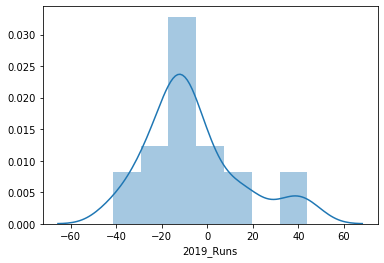

In [171]:
sns.distplot(y_test-lin_pred)

# Ridge 

In [172]:
from sklearn.linear_model import Ridge

from sklearn.model_selection import RandomizedSearchCV

In [173]:
ridge =Ridge()

parameters = {'alpha' :[1e-15,1e-10,1e-8,1e-2,1,5,10,20,30,35,40]}

ridge_regr = RandomizedSearchCV(ridge,parameters,scoring = 'neg_mean_squared_error',cv=5)
ridge_regr.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1,
                                                  5, 10, 20, 30, 35, 40]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [174]:
print(ridge_regr.best_params_)
print(ridge_regr.best_estimator_)


{'alpha': 40}
Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [175]:
out = Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [176]:
out.fit(X_train,y_train)

Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [177]:
 pred = out.predict(X_test)

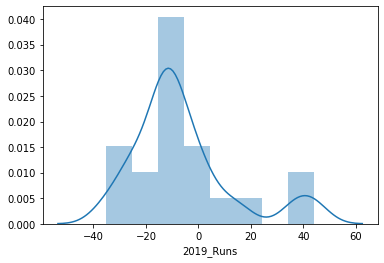

In [178]:

sns.distplot(y_test-pred)

# XGB-Regressor

In [179]:
import xgboost as xgb

In [180]:
model1 = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [181]:
model1.fit(X_train,y_train)

[14:46:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [182]:
xgb_pred = model1.predict(X_test)
xgb_pred

array([445.12973 , 396.97415 ,  63.928787, 106.00024 , 334.3632  ,
        15.028836,  21.416288, 528.0445  ,  98.38449 , 489.83823 ,
        31.99605 ,  39.30237 ,  39.62934 ,  69.29265 ,  17.221437,
        84.18284 , 106.13429 ,  32.99461 , 295.23    ,  73.56997 ],
      dtype=float32)

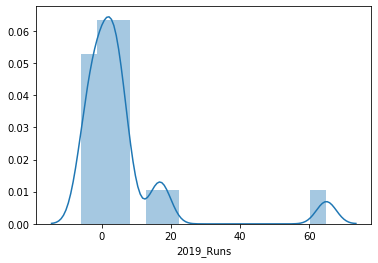

In [183]:
sns.distplot(y_test-xgb_pred)

In [184]:
xgb_res = pd.DataFrame()
xgb_res['orginal'] = y_test
xgb_res['model'] = xgb_pred

xgb_res


,orginal,model
26,463,445.129730
86,402,396.974152
2,63,63.928787
55,110,106.000237
75,342,334.363190
93,14,15.028836
16,25,21.416288
73,593,528.044495
54,95,98.384491
95,488,489.838226


In [185]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, xgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, xgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

MAE: 7.866252279281616
MSE: 252.98791604201128
RMSE: 15.905593860086183



By using xgbregressor we got RMSE : 15.9


In [186]:
#created new data frame for player name in test set

test_players = pd.DataFrame()
test_players['name'] = test['PLAYER'] 
test = test.drop(['PLAYER'],axis= 1)

In [187]:
test.columns

Index(['Mat', 'Inns', 'NO', 'HS', 'Avg', 'BF', 'SR', 100, 50, '4s', '6s',
       '2019_Runs'],
      dtype='object')

In [188]:
final_test = test[['Mat', 'Inns', 'NO', '2019_Runs','HS', 'Avg', 'BF', 'SR', 100, 50, '4s', '6s']]

In [189]:
final_test = final_test.rename(columns = {"2019_Runs":"prev_Runs"})

In [190]:
final_test

,Mat,Inns,NO,prev_Runs,HS,Avg,BF,SR,100,50,4s,6s
0,12,12,2,692,100,69.20,481,143.86,1,8,57,21
1,14,14,3,593,100,53.90,438,135.38,1,6,49,25
2,16,16,1,529,81,35.26,398,132.91,0,4,45,25
3,16,16,1,521,97,34.73,384,135.67,0,5,64,11
4,14,13,4,510,80,56.66,249,204.81,0,4,31,52
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,2,0,11,6,5.50,10,110.00,0,0,1,0
96,13,3,3,10,10,10.00,3,333.33,0,0,1,1
97,3,1,0,9,9,9.00,10,90.00,0,0,0,0
98,7,4,0,9,5,2.25,12,75.00,0,0,1,0


# Prediction on given test data

In [191]:
final_result = model1.predict(final_test)

In [192]:
final_result

array([527.7695   , 520.40985  , 463.82193  , 462.3965   , 462.73123  ,
       442.38327  , 442.3461   , 415.01608  , 414.98325  , 406.25723  ,
       406.407    , 404.968    , 406.117    , 396.9965   , 395.91858  ,
       393.8745   , 533.81323  , 396.97934  , 395.89877  , 533.75543  ,
       394.6988   , 372.06815  , 372.0588   , 370.97186  , 370.97186  ,
       355.34003  , 356.00183  , 355.369    , 342.29453  , 439.4741   ,
       333.19778  , 316.9507   , 283.8142   , 282.6864   , 244.85802  ,
       220.37912  , 220.22786  , 184.18884  , 184.13904  , 183.08278  ,
       183.89029  , 179.81534  , 180.18088  , 179.78705  , 168.08989  ,
       161.9543   , 162.05527  , 115.087494 , 106.094734 ,  98.38449  ,
        98.37755  ,  98.2517   ,  90.30254  ,  90.18465  ,  90.002625 ,
        86.02727  ,  84.18942  ,  84.18942  ,  73.84653  ,  73.99144  ,
        70.38056  ,  69.47712  ,  69.19805  ,  65.11869  ,  66.01051  ,
        66.2276   ,  64.06198  ,  61.557545 ,  32.035606 ,  21.5

In [193]:
#creating a data frame for solution

solution = pd.DataFrame()
solution['PLAYER'] = test_df['PLAYER']
solution['2020_Runs'] = final_result

solution

,PLAYER,2020_Runs
0,David Warner,527.769470
1,KL Rahul,520.409851
2,Quinton de Kock,463.821930
3,Shikhar Dhawan,462.396515
4,Andre Russell,462.731232
...,...,...
95,Carlos Brathwaite,9.510165
96,Ishant Sharma,10.285615
97,Shakib Al Hasan,10.250641
98,Pawan Negi,9.441010


In [194]:
solution['2020_Runs'] = solution['2020_Runs'].astype('int')
solution.head(5)

,PLAYER,2020_Runs
0,David Warner,527
1,KL Rahul,520
2,Quinton de Kock,463
3,Shikhar Dhawan,462
4,Andre Russell,462


In [195]:
#solution.to_csv('solution.csv')